# <b><span style="color:#14c8b3"><center> Jobs EDA Steps  </span></b> </center>


   
<span> <center><img src="https://www.springboard.com/blog/wp-content/uploads/2020/10/dataset-analysis.png" width="700" /></span>

In [41]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.corpus import stopwords as STOPWORDS
import nltk
from PIL import Image
from wordcloud import WordCloud 
from IPython.core.pylabtools import figsize

# figure size in inches
from matplotlib import rcParams


import warnings
warnings.filterwarnings('ignore')


***

## Loading Dataset


***

In [2]:
# Load the dataset
df = pd.read_csv('data_jobs.csv')
df.head()

,Unnamed: 0,position,company,level,job_functions,industries,description,day,month,quarter,city,Regions,industry_cat,TotalPositions,PositionsByMonth,year_of_ex,degrees
0,0,Employee Engagement Specialist,PepsiCo,MidSenior level,Human Resources,Consumer Goods Food Beverages,uto req id 199735brjob descriptionpepsico sud...,6,1,1,Riyadh,Riyadh,Consumer Goods,219,2339,3,bachelor
1,1,Account Manager GPS Riyadh,EY,Not Applicable,Sales Business Development,Accounting Financial Services,busess where re our people re our products ...,6,1,1,Riyadh,Riyadh,Accounting,101,2339,7,Higher Vocational Education
2,2,Business Analyst,تطوير تقنيات التعليم Tatweer Educational Tech...,MidSenior level,Business Development Sales,Information Technology and Services,the idel cidte will design gnize modify the...,6,1,1,Riyadh,Riyadh,Information Technology and Services,16,2339,5,bachelor
3,3,Talent Acquisition Advisor,WSP in the Middle East,Associate,Finance,Construction,thk bigger scle thk higher prile thk ground ...,6,1,1,Riyadh,Riyadh,Construction,43,2339,5,Higher Vocational Education
4,4,Organisational Design Specialist,Aventus Global Talent,MidSenior level,Human Resources Design,Financial Services Banking,gntionl design specilt estern region sudi rb...,6,1,1,Remote,Remote,Financial Services,28,2339,5,bachelor


In [3]:
#data.column method returns an array of columns list. 
df.columns

Index(['Unnamed: 0', 'position', 'company', 'level', 'job_functions',
       'industries', 'description', 'day', 'month', 'quarter', 'city',
       'Regions', 'industry_cat', 'TotalPositions', 'PositionsByMonth',
       'year_of_ex', 'degrees'],
      dtype='object')

In [4]:
#dimensions of a given DataFrame.
df.shape

(40500, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40500 entries, 0 to 40499
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        40500 non-null  int64 
 1   position          40500 non-null  object
 2   company           40498 non-null  object
 3   level             40500 non-null  object
 4   job_functions     40500 non-null  object
 5   industries        40500 non-null  object
 6   description       40500 non-null  object
 7   day               40500 non-null  int64 
 8   month             40500 non-null  int64 
 9   quarter           40500 non-null  int64 
 10  city              40500 non-null  object
 11  Regions           40500 non-null  object
 12  industry_cat      40500 non-null  object
 13  TotalPositions    40500 non-null  int64 
 14  PositionsByMonth  40500 non-null  int64 
 15  year_of_ex        40500 non-null  int64 
 16  degrees           40500 non-null  object
dtypes: int64(7),

In [6]:
#Drop Unnamed: 0 column
df= df.drop(['Unnamed: 0'], axis=1)

In [7]:
# handle Null values
df.isnull().sum()

position            0
company             2
level               0
job_functions       0
industries          0
description         0
day                 0
month               0
quarter             0
city                0
Regions             0
industry_cat        0
TotalPositions      0
PositionsByMonth    0
year_of_ex          0
degrees             0
dtype: int64

In [8]:
# delete null values --> delete two rows  
df = df.dropna(axis=0, subset=['company'])

***
# Create Logo For The Project


***

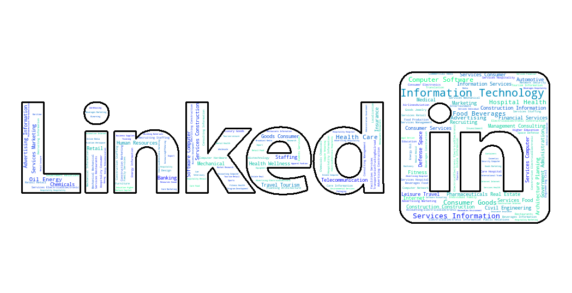

In [9]:
# Generate a word cloud of industry_cat in image
stopwords = nltk.corpus.stopwords.words('english')
mask = np.array(Image.open("l3.png"))
wordcloud = WordCloud(stopwords=stopwords,max_font_size=500,background_color='white', max_words=700, mask=mask,contour_color='black',contour_width=2,colormap='winter').generate(' '.join(df['industry_cat']))

# create image as cloud
plt.figure(figsize =(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("LinkedIn.png", format="png")


plt.show()

***
# Exploratory Data  Analysis 


***

### 1st plot || The Distribution of Job Positions in the Saudi Arabia Regions
#### This plot gives insight into the distribution of job positions in the Saudi Arabia regions. As shown below Riyadh is the first word we read, then the Remote job which is indicative that most jobs transformed to work remotely in 2020 because of Covid-19.

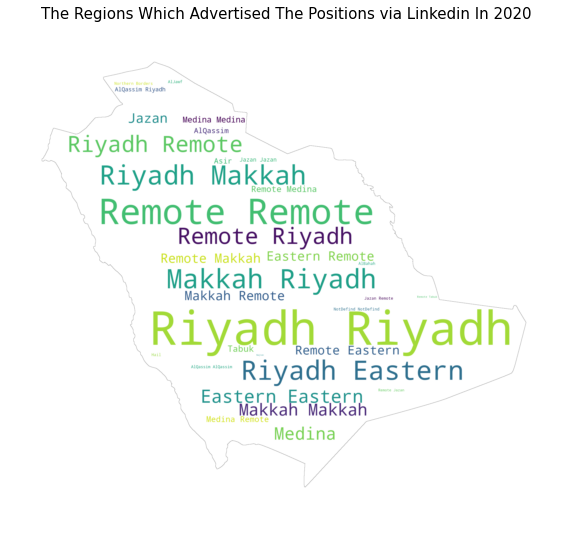

In [10]:
# Generate a word cloud of industry_cat in image
stopwords = nltk.corpus.stopwords.words('english')
mask = np.array(Image.open("ksa2.png"))
wordcloud = WordCloud(stopwords=stopwords,background_color='white',max_font_size=200, mask=mask,contour_color='gray',contour_width=1,colormap='viridis').generate(' '.join(df['Regions']))

# create image as cloud
plt.figure(figsize =(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")

# store to file
#plt.savefig("ksa0.png", format="png")

# Add title
plt.title("The Regions Which Advertised The Positions via Linkedin In 2020",fontsize=15)

plt.show()

### 2nd plot || Distribution of the Total Job Vacancies Announced in Each Month for the Top Five Regions with Vacancies Job.
#### This plot gives insight into the distribution of the total job vacancies announced in each month of 2020 for the top five regions that have vacancies job. Regions show a noticeable decrease since the second month in almost all regions for a period of 6 months, then they rise again quickly, in contrast to remote jobs, and this tells us the change in job status during the quarantine period in the Corona pandemic.

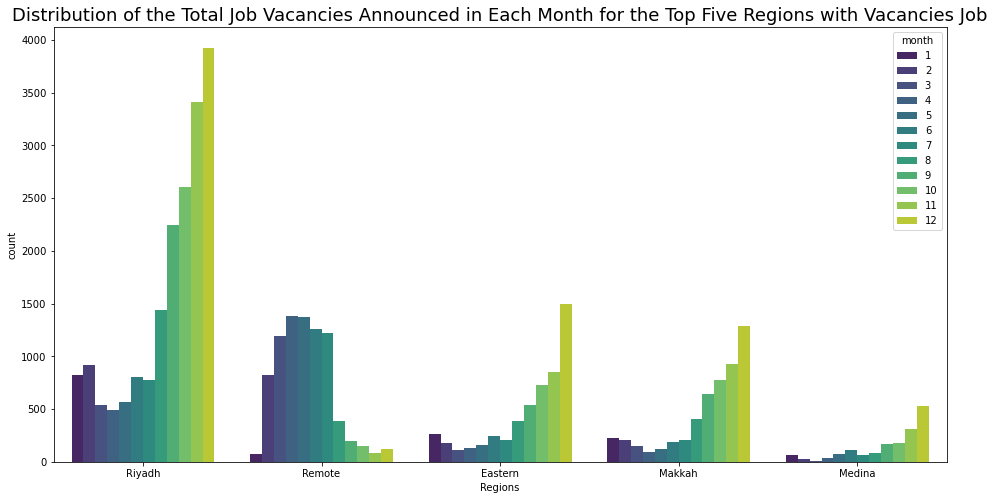

In [11]:
#Count of the most common jobs posting by city, splitting them based on the quarter
plt.figure(figsize=(16,8))
sns.countplot(x='Regions',hue='month',data=df,palette='viridis',order=df['Regions'].value_counts().nlargest(5).index)
plt.title("Distribution of the Total Job Vacancies Announced in Each Month for the Top Five Regions with Vacancies Job",fontsize=18)


plt.show()

### 3rd plot || Total Positions Based On Each Quarter In 2020 
#### This plot gives insight into how companies announced more jobs in the first quarter of 2020 than in the rest of the year, in order to compensate for the damage caused by the Covid-19 pandemic.

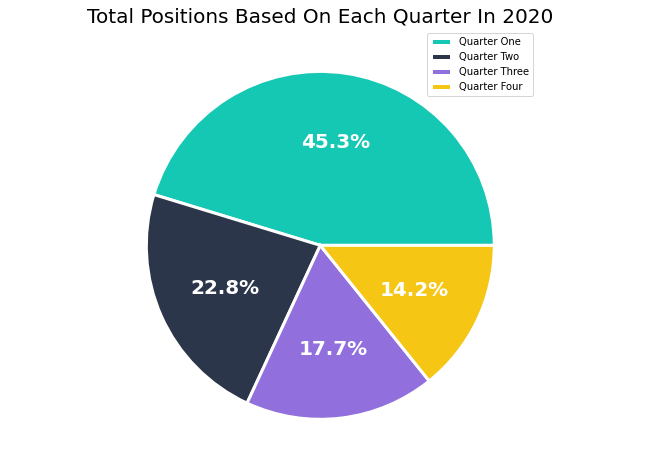

In [12]:
# define color
c= ['#14c8b3','#2b364a','#916fdd','#f5c614']

#Set fig size
fig = plt.figure(figsize =(8, 8))

# set the labels of figure 
lable=["Quarter One","Quarter Two","Quarter Three","Quarter Four"]

#plotting pie-plot
plt.pie(df.quarter.value_counts(['1','2','3','4']), labels=lable, colors=c, autopct = '%1.1f%%',textprops={'fontsize': 20,'color':'white', 'fontweight':'bold'}, wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'})
plt.legend()

# Add title
plt.title("Total Positions Based On Each Quarter In 2020",fontsize=20)

# show plot
plt.show()

### 4th plot || The Most 20 Industries Request from Companies in 2020 
#### This plot gives insight into the  20 most wanted industries in the labor market during 2020. It is not surprising that we see that the field of information technology and services takes the first place, as Saudi Arabia has taken an interest in technological progress, and we have all noticed that this industry has flourished more since the emergence of the Covid-19 pandemic. Then next is the Construction, which reflects the cultural renaissance and urban development that the Kingdom aspires to achieve in achieving Vision 2030.

In [39]:
industry=df['industry_cat'].value_counts().head(20)

fig=px.bar(industry,x=industry.index,
           y=industry.values,
           color=industry.index,
           text=industry.values,
           labels={'index':'industry name','y':'number of position in industry','text':'count'},
           template='seaborn',
           title='<b> The Most 20 Industries Request from Companies in 2020')

fig.show()

### 5th plot || The Most 20 job functions Request from Companies in 2020
#### This plot gives insight into the 20 most wanted job functions in the labor market during 2020. we see that management manufacturing is the first request in the job positions. followed by sales business development and then information technology. This statistic may help the student to choose the specialization that serves the functions required in the labor market 

In [34]:
functions=df['job_functions'].value_counts().head(20)

fig=px.bar(functions,y=functions.index,
           x=functions.values,
           color=functions.index,
           text=functions.values,
           labels={'index':'job functions','x':'number of position in job functions','text':'count'},
           template='seaborn',
           title='<b> The Most 20 job functions Request from Companies in 2020')
fig.show()

### 6th plot || The Distribution of Demands Job Based on Academic Degrees 
#### This plot gives insight into the academic degree rate required for job positions. We see that Higher Vocational Education, which means preparing students to work in a specific profession or craft, attracts employers to contract with them more than others, then followed by bachelor’s students, and we see that students have job opportunities, they may work as practical training to achieve an academic degree or additional income during the period of study, while there is very little demand for a doctorate degree.

In [38]:
fig = px.pie(df.groupby('degrees', as_index=False)['degrees'].count().sort_values(by='degrees',ascending=False).head(10),
             names=['Higher Vocational Education','bachelor','diploma','master','student','Doctorate'],
             values='degrees',
             color='degrees',
             hole=0.8,
             #labels={'degree':'degree','count':'count'},
             template='seaborn',title='<b> The Distribution of Demands Job Based on Academic Degrees in 2020')


fig.update_layout(title_x=0.2,legend=dict(orientation='h',yanchor='bottom',y=1.0,xanchor='right',x=1))

### 7th plot || The Distribution of Required Levels of Jobs in 2020 
#### This plot gives insight into the rate of required levels of jobs in 2020.  We can see the Entry-level and Mid-level jobs are almost the same rates with a little pet increase of required in Mid-level jobs. Follow that Associate-level with the same rates also, which usually designates a position that requires two or three years of experience. We noted the create decrease when we talked about the director-level and executive-level jobs. In the end, Internship-level is not a favorite with both seeker and employer it shapes less than 1% of the count of required jobs.


In [16]:
fig = px.pie(df.groupby('level', as_index=False)['level'].count().sort_values(by='level',ascending=False).head(10),
             names=['MidSenior level','Entry level','Associate','Not Applicable','Director','Executive','Internship'],
             values='level',
             color='level',
             hole=0.5,
             labels={'experience_level':'job level ','level':'count'},
             template='seaborn',title='<b>  The Distribution of Required Levels of Jobs in 2020')


fig.update_layout(title_x=0.2,legend=dict(orientation='h',yanchor='bottom',y=1.0,xanchor='right',x=1))

### 8th plot ||  Different Education Degrees in Regions with years of Experience
#### This plot gives insight into jobs that require a degree of Vocational Education wherein are accepted in the absence of experience by the employer, and this is evidence of the efficiency of this degree in producing a worker with high professional competence. Also, we noted that the higher we rise the academic degree, the fewer employment opportunities for those without experience in most of the regions in 2020. This may be an indication of employers' desire to compensate for losses after the Covid-19 pandemic by accepting seekers who have experience.

In [17]:

fig=px.treemap(df,path=[px.Constant('degrees'),'degrees','Regions','year_of_ex'],
               hover_name='degrees',
               template='seaborn',
               title='<b> Different Education Degrees in Regions with years of Experience')
fig.update_traces(root_color='lightgrey')


### 9th plot || The Distribution of Demands Job Levels Based on Academic Degrees
#### This plot gives insight into the academic degrees required for a job position based on job levels. We see that Higher Vocational Education, which means preparing students to work in a specific profession or craft, attracts employers to contract with them more than others at all job levels, then followed by bachelor’s students with a MidSenior level, The master’s degree is close to the level of a mid-level sensor and Associate, while the diploma is the most requirement in with Entry level position, and we see that students have job opportunities, they may work as practical training to achieve an academic degree or additional income during the period of study, while there is very little demand for a doctorate degree.

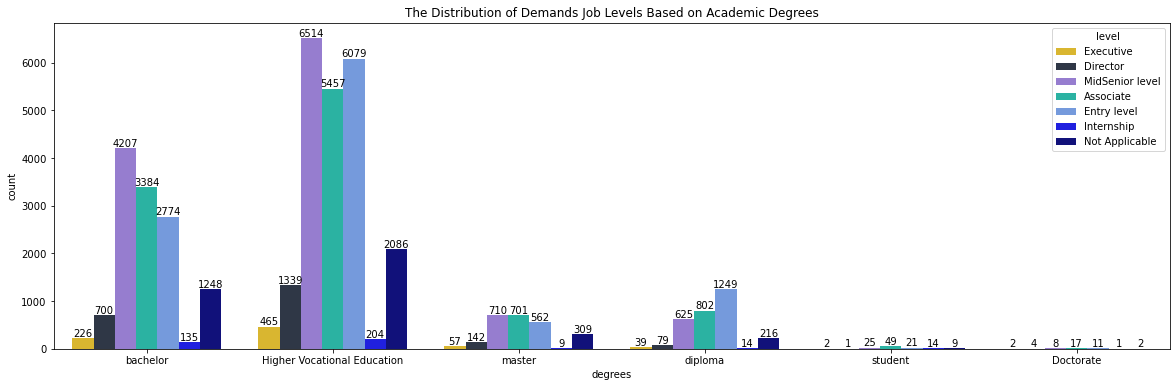

In [18]:
# define color

palette = ['#f5c614', '#2b364a', '#916fdd', '#14c8b3','#6495ED', '#0000FF', '#00008B']

plt.figure(figsize=(20,6))

hue_order = ['Executive', 'Director', 'MidSenior level','Associate','Entry level','Internship','Not Applicable']

ax = sns.countplot(x= "degrees"  , hue = "level", hue_order=hue_order,palette=palette, data = df)

plt.title("The Distribution of Demands Job Levels Based on Academic Degrees")

for i in ax.containers:   #to set a level on top of the bars.
    ax.bar_label(i,)

### 10th plot || Top 10 Companies with Maximum Number of Job Postings 
#### This plot gives insight into the top 10 companies with a maximum number of job postings. We see that the first companies are well-established companies in the Kingdom, and this also indicates the large size of the company. When looking quickly at the first three companies, we find that AFRY company which providing comprehensive locally-based engineering and consultancy services. Parsons Company Provides engineering, construction, and technical services, and the third is a Confidential Company that services and consulting in the field of information technology

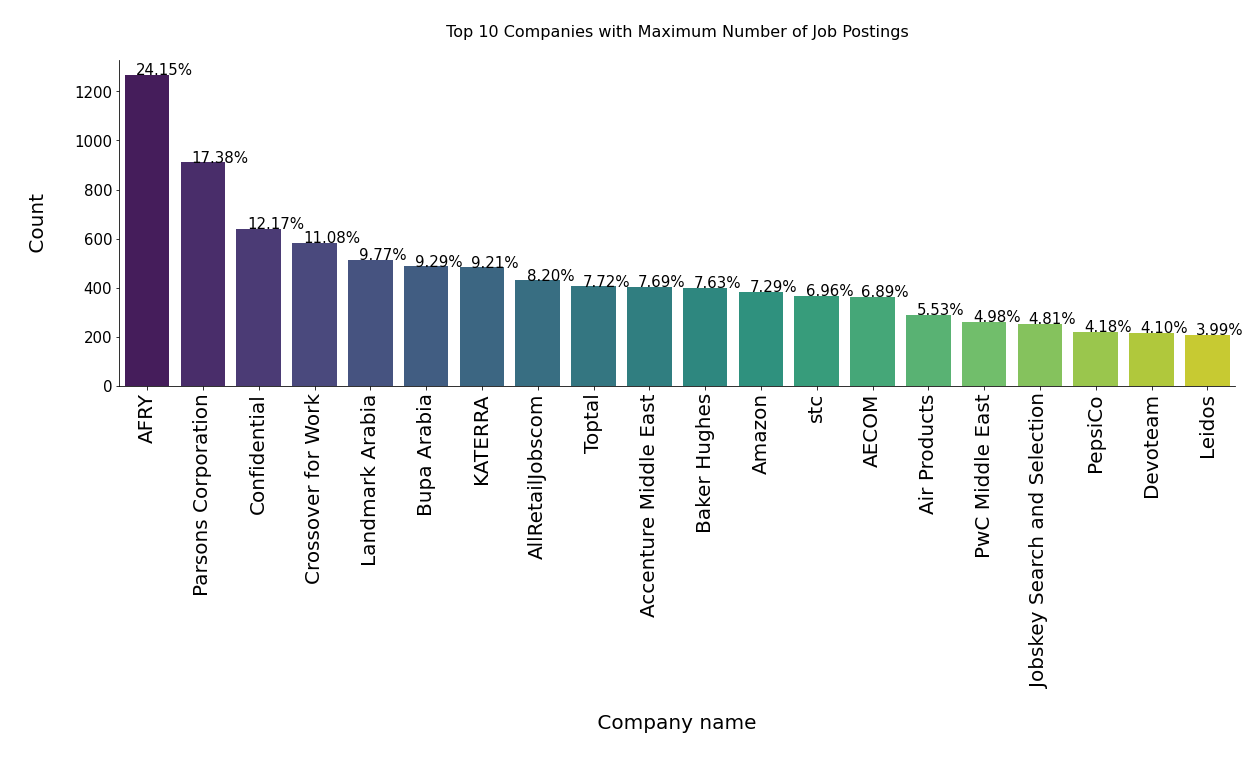

In [43]:
#Lets visualize the top 10 companies with the most number of job postings.

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,6))
a = sns.barplot(x= df["company"].value_counts().sort_values(ascending=False).head(20).index ,palette='viridis',y= df["company"].value_counts().sort_values(ascending=False).head(20))

#Removing top and Right borders

sns.despine(bottom = False, left = False)

rcParams['figure.figsize'] = (25,9)

#Putting % on the bar plot. Credit: Stackoverflow
spots = df["company"].value_counts().sort_values(ascending=False).index[0:20]
for p in ax.patches:
    ax.text(p.get_x() + 0.2, p.get_height()+0.5, '{:.2f}%'.format((p.get_height()/5243)*100),fontsize=15)

#Beautifying the plot
plt.title('\n Top 10 Companies with Maximum Number of Job Postings \n', size=16, color='black')
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=15)
plt.xlabel('\n Company name \n', fontsize=20, color='black')
plt.ylabel('\n Count \n', fontsize=20, color='black')
plt.show()

### 11th plot || The Most 20 position Request from Companies in 2020 
#### This plot gives insight into the 20 most wanted positions in the labor market during 2020.

In [45]:
industry=df['position'].value_counts().head(20)

fig=px.bar(industry,x=industry.index,
           y=industry.values,
           color=industry.index,
           text=industry.values,
           labels={'index':'position name','y':'number of position','text':'count'},
           template='seaborn',
           title='<b> The Most 20 position Request from Companies in 2020')

fig.show()

### 12th plot ||  Years of experience requierd in each position
#### This plot gives insight into the years of experience required in random positions selected in the labor market during 2020.

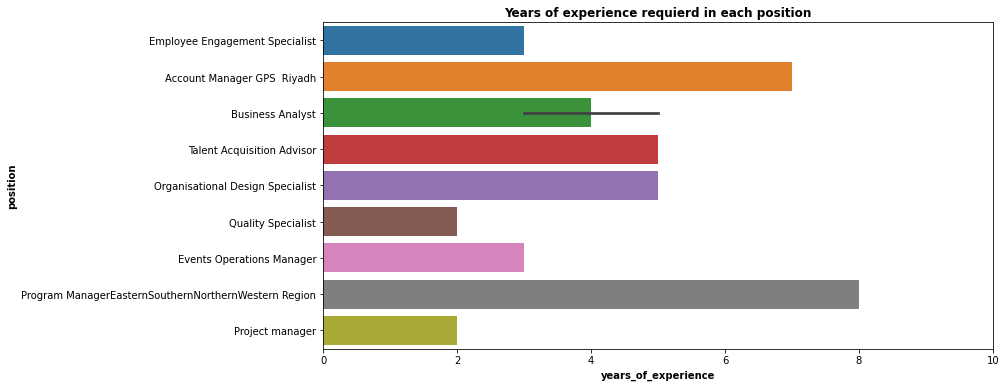

In [22]:
#total_position_each_job=highest_jobs.sort_values('year_of_ex',ascending=False)
plt.figure(figsize=(12,6))
axis1=sns.barplot(x=df['year_of_ex'].head(10), y=df['position'].head(10), data=df.head(10))
plt.xlim(0,10)
plt.title('Years of experience requierd in each position', weight='bold')
plt.xlabel('years_of_experience', weight='bold')
plt.ylabel('position', weight='bold');
#plt.savefig('highest_Jobs.png')